In [1]:
## Poisson Equation
# Load  FEM Packages
from fenics import *
from mshr import *
import numpy as np
# Plotting Libraries
import matplotlib.pyplot as plt
plt.style.use("_classic_test_patch")
import time # Timing
# File Handling
import os

In [2]:
start = time.time()
# Define geometric parameters
inner_radius = 0.5
outer_radius = 2.0

# Classes for boundaries 
class InnerBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary
    
class OuterBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return sqrt(x[0]**2 + x[1]**2)  < outer_radius - DOLFIN_EPS and on_boundary

# Function Definition
def PlotFields(u_field, e_field):
    """
    PlotFields(u_field, e_field)
    """
    fig = plt.figure(figsize = (14,10))                       # Set the resolution
    plt.subplot(121)
    figU = plot(u_field)
    cbarV = plt.colorbar(figU, shrink=0.5)
    cbarV.set_label("Potential Field")
    # plt.title("Potential Field")
    plt.subplot(122)
    figE = plot(e_field)
    cbarE = plt.colorbar(figE, shrink = 0.5)
    cbarE.set_label("Electric Field")
    # plt.title("Electric Field")
    plt.show()

def AnalyticV(x, a, b):
    """
    Analytical Solution:
    u(x) = - (10  / np.log(b/a)) * np.log(x/a) + 10
    """
    return - (10  / np.log(b/a)) * np.log(x/a) + 10

def AnalyticE(x, a, b):
    """
    Electric Field
    E(x) = - 10 / x
    """
    return ((10  / np.log(b/a)) * (1 / x))

def PlotComparissonVField(x, y, inner_radius, outer_radius):
    plt.figure(dpi=400)                       
    plt.plot(x, y)
    plt.plot(x, AnalyticV(x, inner_radius, outer_radius), '--')
    # plt.title("Comparisson Between Aproximate and Analytic Solution for Potential")
    plt.xlabel("Radius")
    plt.ylabel("Potential Field")
    plt.legend(["FEM", "Analytic"])
    plt.grid()
    plt.savefig("ComparissonPotentialFEMCoaxial.png")
    plt.show()                  
    
def PlotComparissonEField(x, y, inner_radius, outer_radius):
    plt.figure(dpi=400)                       
    plt.plot(x, y)
    plt.plot(x, AnalyticE(x, inner_radius, outer_radius), '--')
    # plt.title("Comparisson Between Aproximate and Analytic Solution for Electric Field")
    plt.xlabel("Radius")
    plt.ylabel("Electric Field")
    plt.legend(["FEM", "Analytic"])
    plt.grid()
    plt.savefig("ComparissonElectricFEMCoaxial.png")
    plt.show()  

# Compute Root Mean Square Error
def RMS(y, y_pred):
    """
    RMSE(y, y_pred)
    """
    return np.sqrt(np.mean(np.square(y - y_pred)))

# Compute Mean Absolute Error
def MAE(y, y_pred):
    """
    MAE(y, y_pred)
    """
    return np.mean(np.abs(y - y_pred))                

In [3]:
# Create mesh
domain = Circle(Point(0, 0), outer_radius) - Circle(Point(0, 0), inner_radius)
mesh = generate_mesh(domain, 25)

# Create mesh functions over the cell facets
sub_domains = MeshFunction("size_t", mesh, mesh.topology().dim() - 1)

# Mark all facets as sub domains
sub_domains.set_all(2)
inner = InnerBoundary()
outer = OuterBoundary()
inner.mark(sub_domains, 0)
outer.mark(sub_domains, 1)

# Define function space
V = FunctionSpace(mesh, 'P', 1)
bc0 = DirichletBC(V, Constant(0.0), sub_domains, 0)
bc1 = DirichletBC(V, Constant(10.0), sub_domains, 1)
bcs = [bc0, bc1]

In [4]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(u), grad(v)) * dx
L = Constant('0') * v * dx
u = Function(V)
set_log_level(LogLevel.ERROR) # Hide solver output

# Solve problem
solve(a == L, u, bcs)

In [5]:
# Save solution to file in VTK format
vtkfile = File('Coaxial/solution.pvd')
vtkfile << u

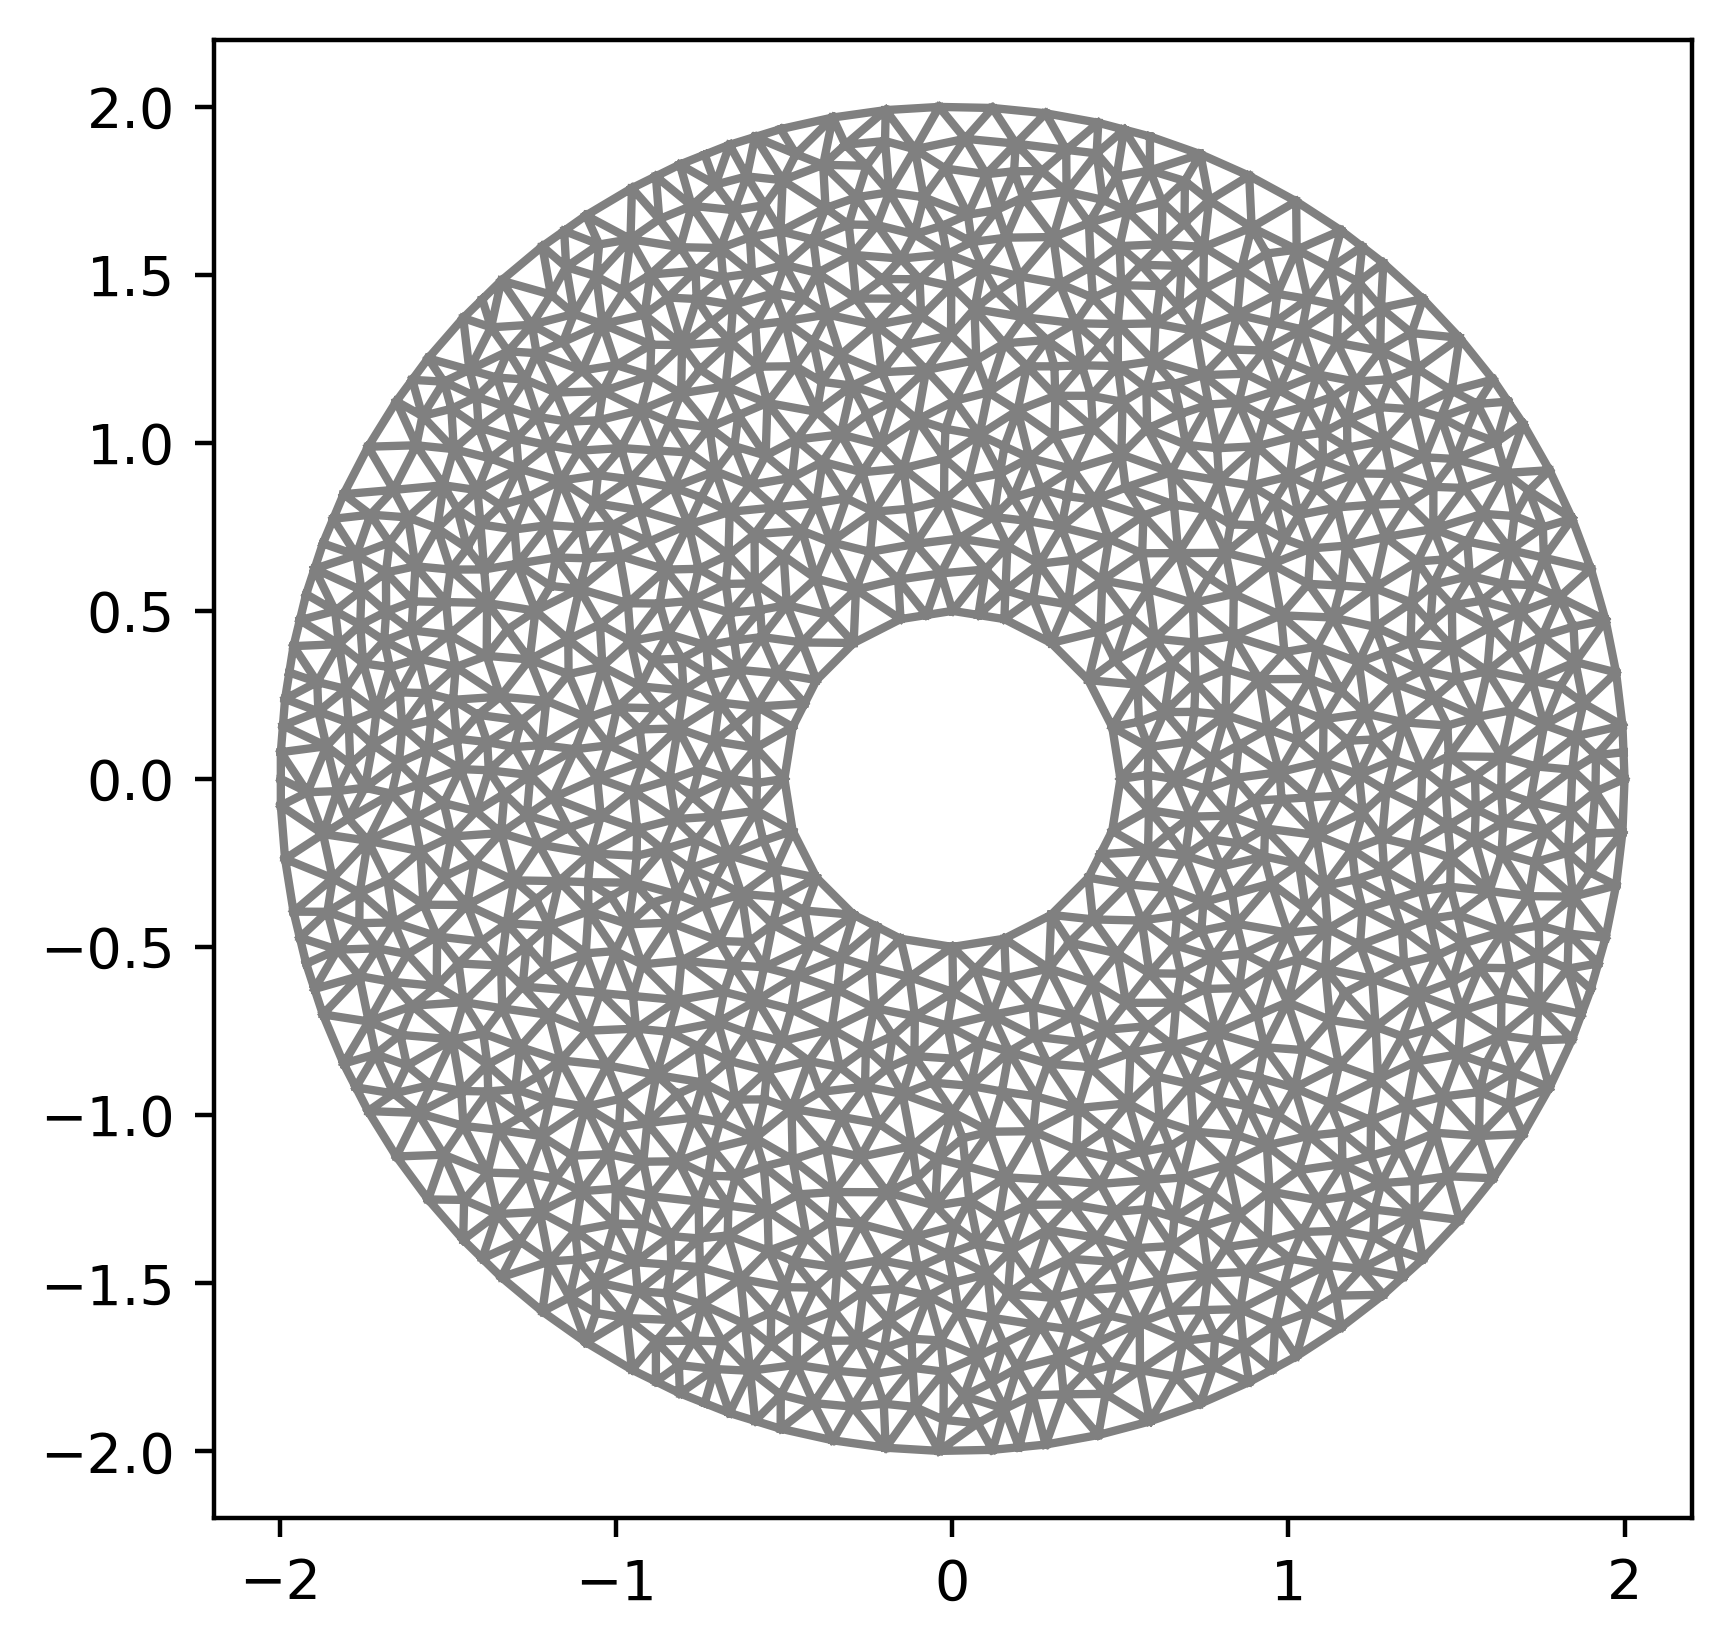

In [6]:
os.chdir("Figures")
## Plotting the solution.
plt.figure(dpi=400)                       
plot(mesh)
# plt.savefig("Coaxial_Mesh.png")              
# plt.colorbar(plot(u)) 
plt.show()


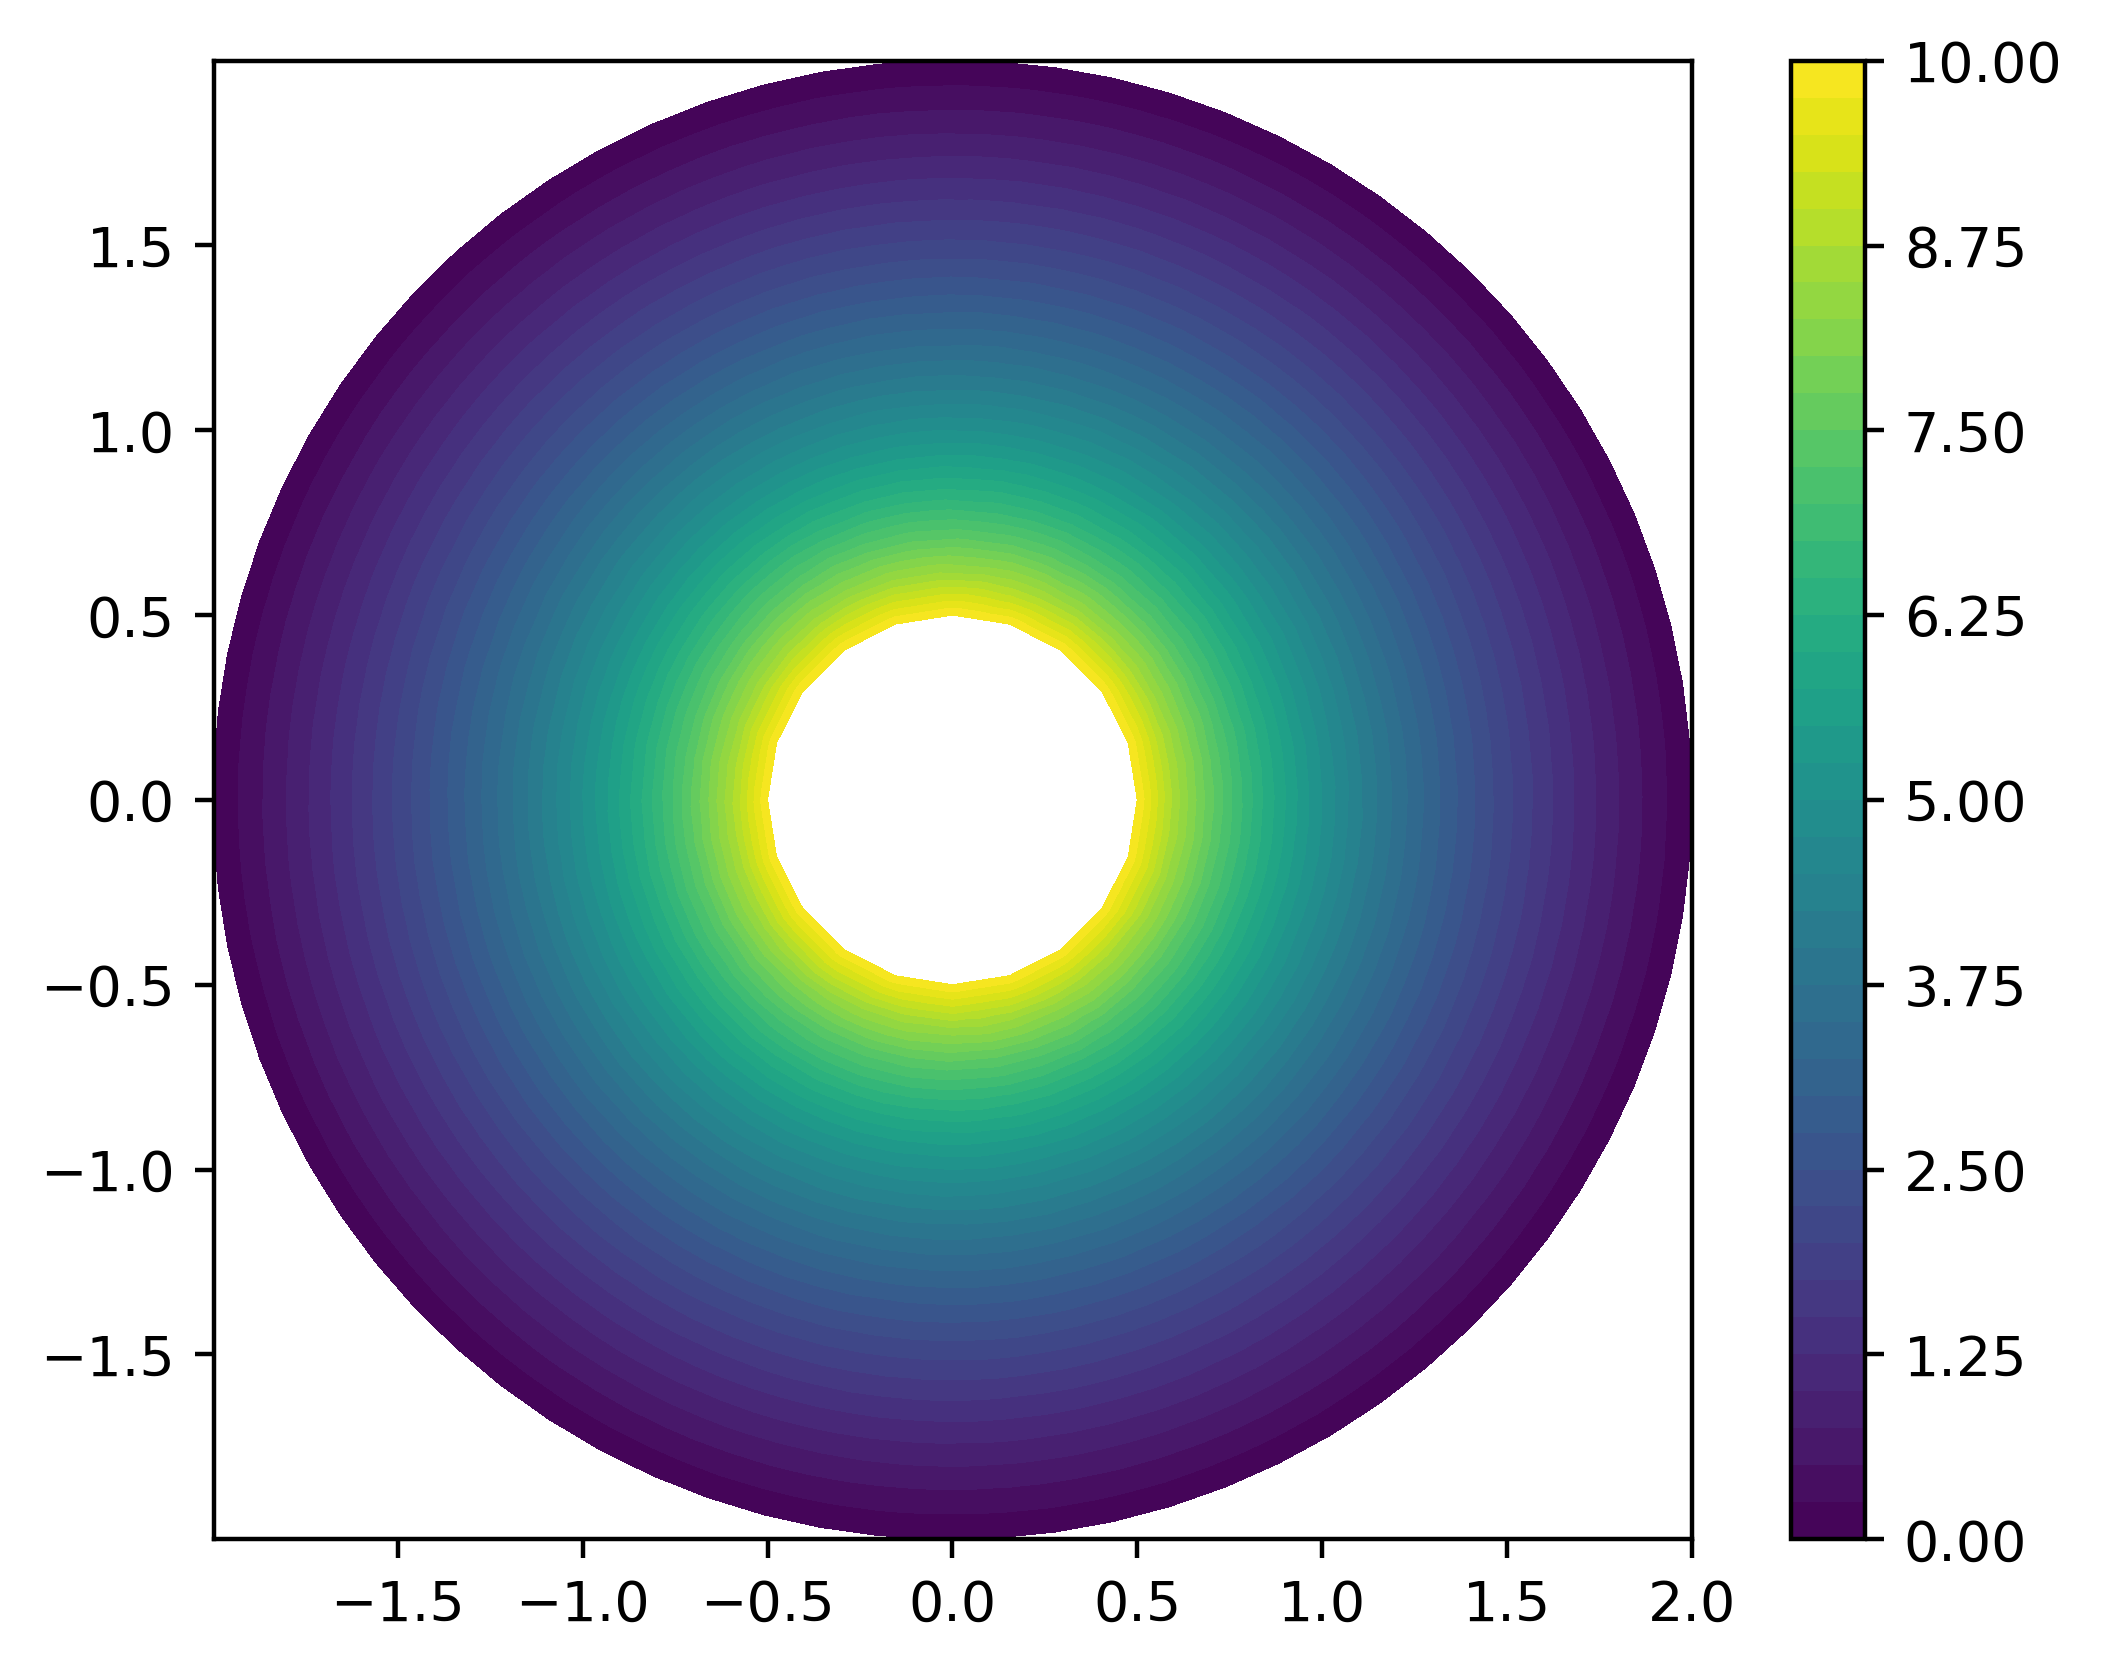

In [7]:
## Plotting the solution.
plt.figure(dpi=400)                       
# plot(u, title = 'Potential Field')              
plt.colorbar(plot(u)) 
# plt.savefig("PotentialFieldFEMCoaxial.png")
plt.show()

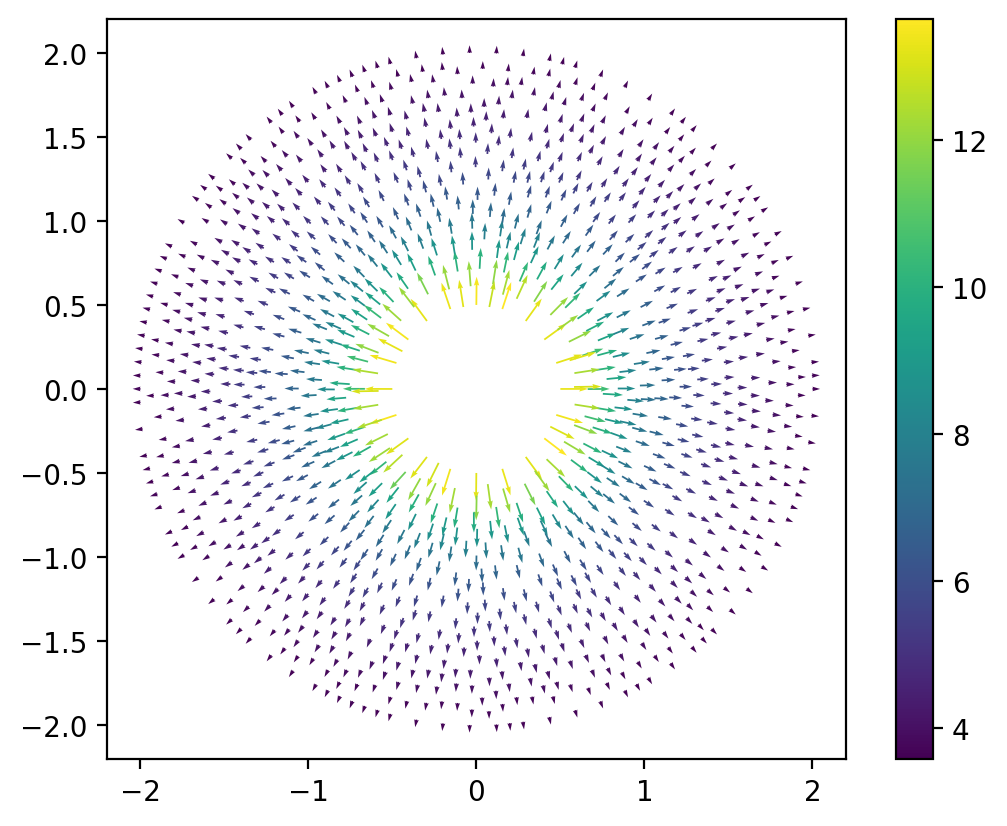

In [8]:
## Plotting the electric field.
e_field = - grad(u)
e = project(e_field)
plt.figure(dpi=200)                       
# plot(e, title = 'Electric Field')              
plt.colorbar(plot(e)) 
# plt.savefig("ElectricFieldFEMCoaxial.png")
plt.show()                  

In [9]:
# PlotFields(u, e)
# plt.savefig("FEMCoaxial.png")

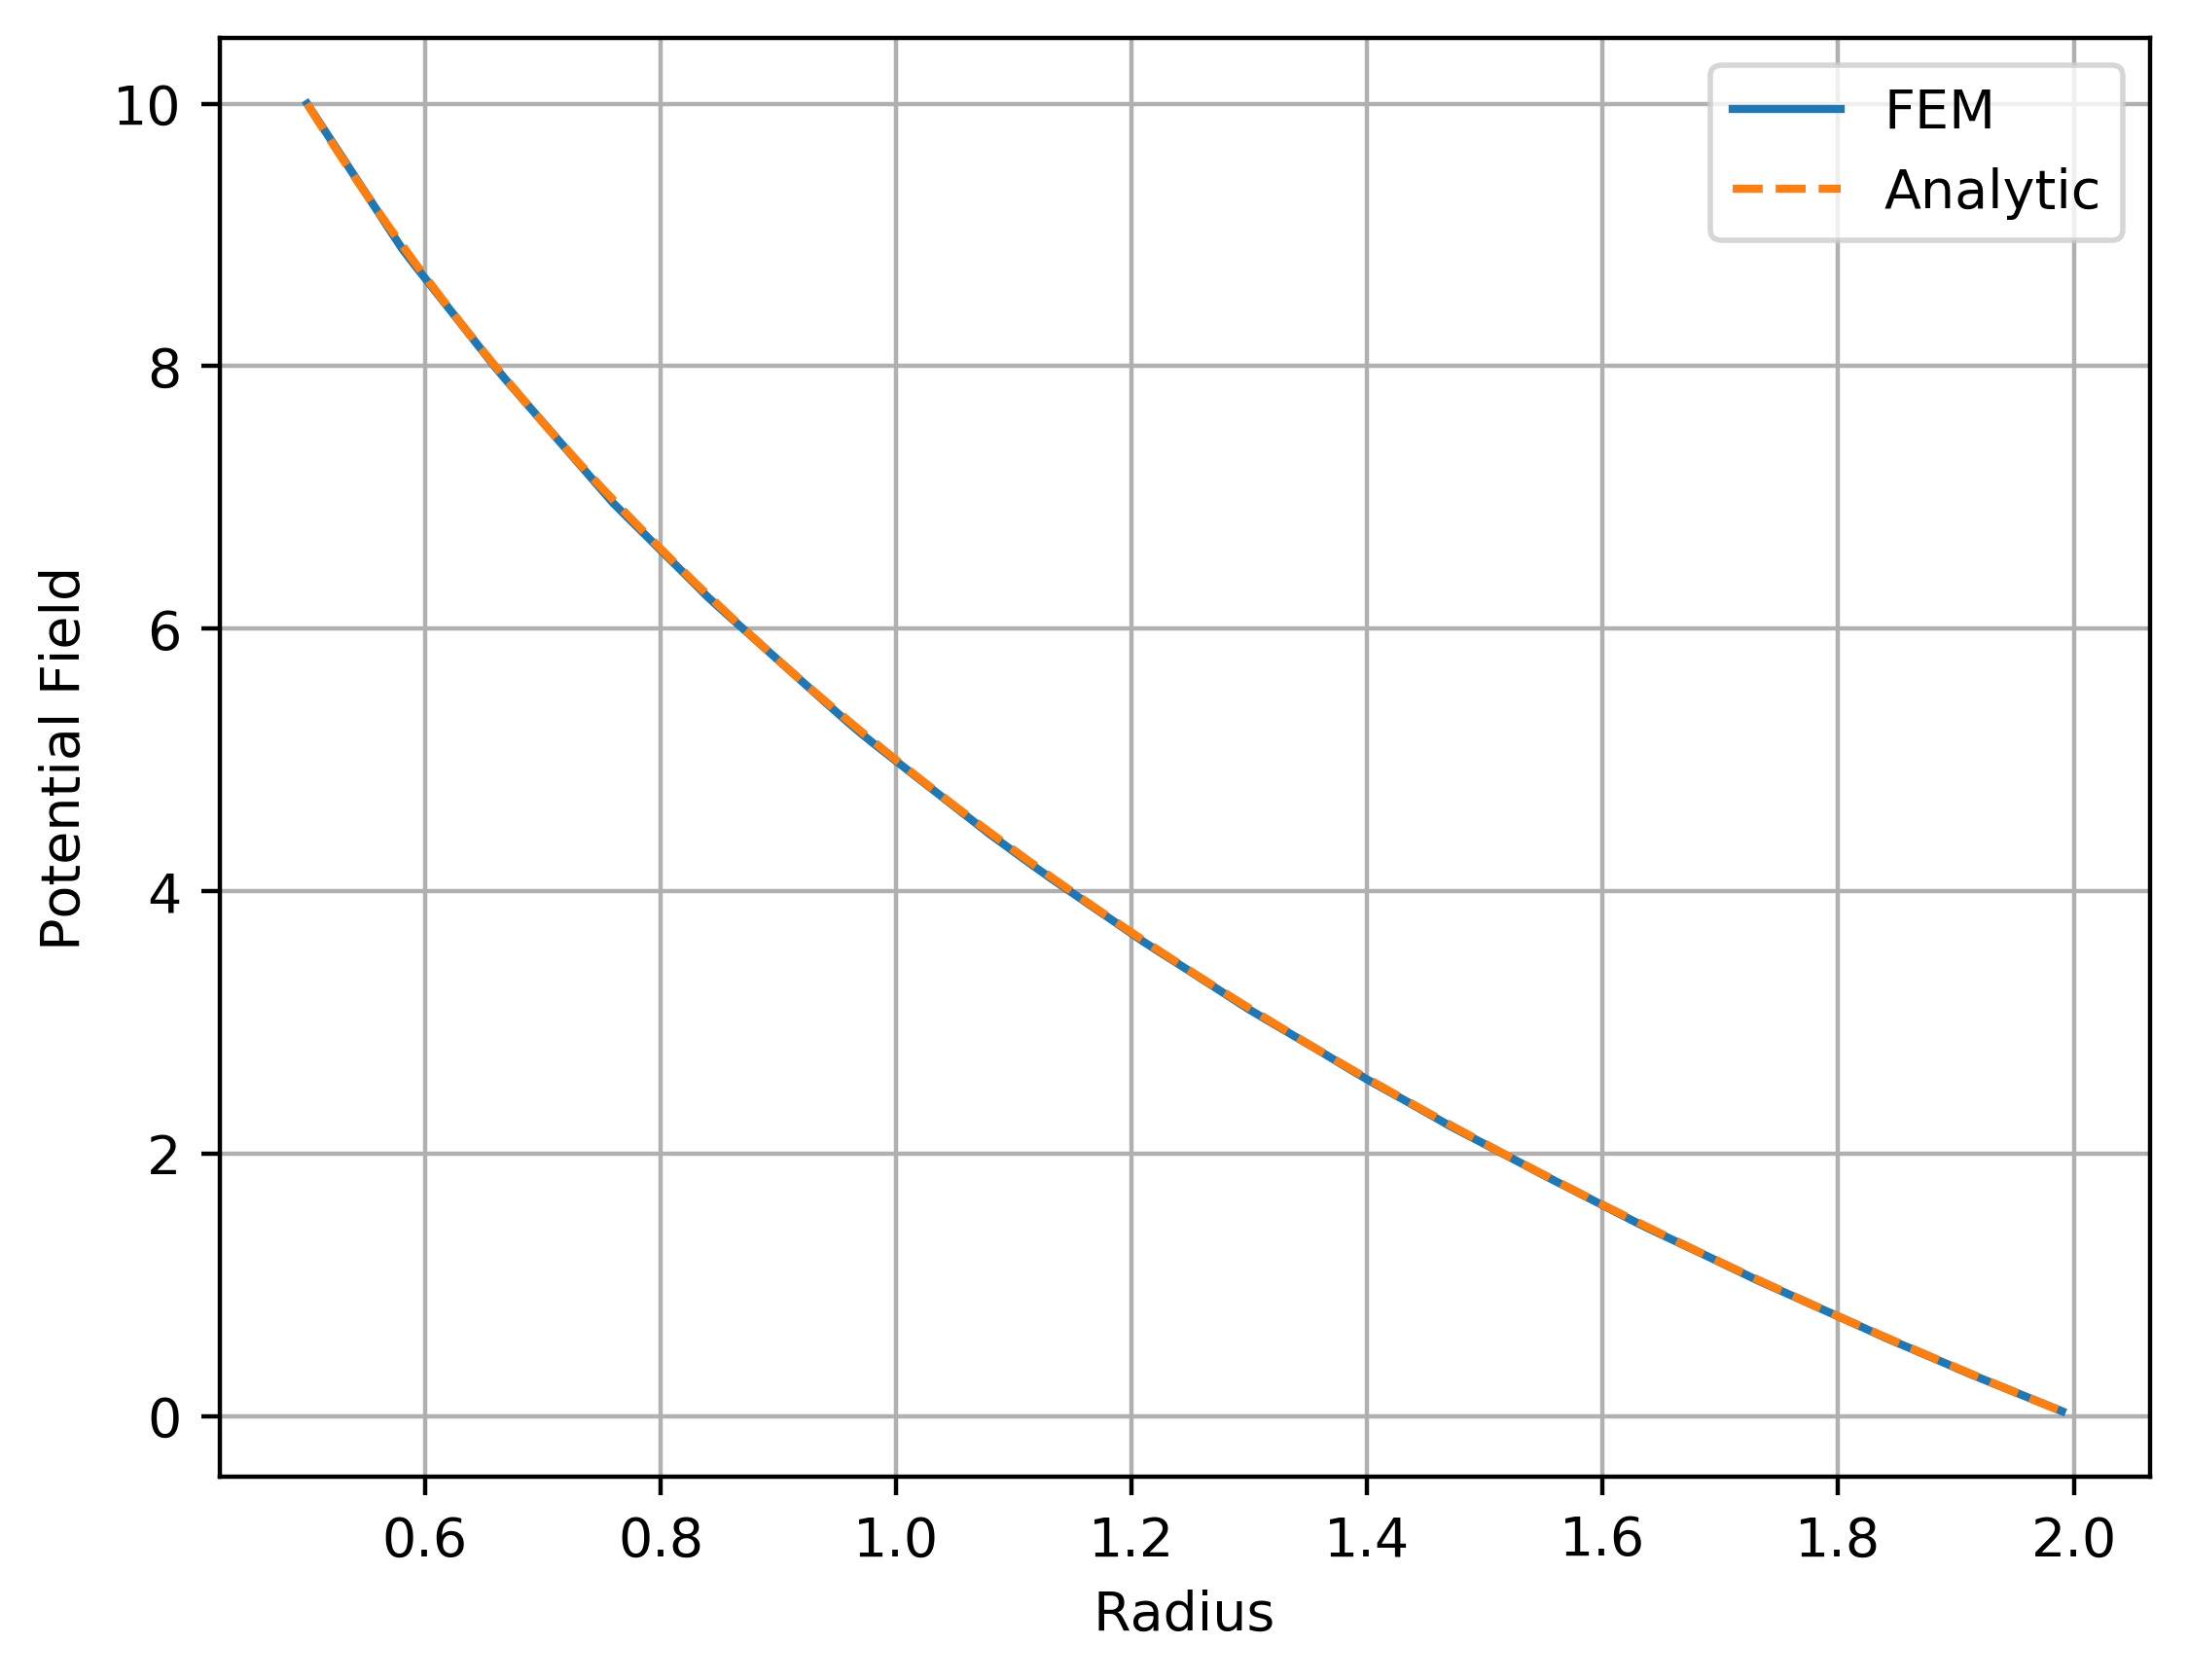

In [10]:
# Comparisson with the Potential Field
x = np.arange(inner_radius, outer_radius, 0.01)
y = [u(Point(i, 0)) for i in x]
PlotComparissonVField(x, y, inner_radius, outer_radius)



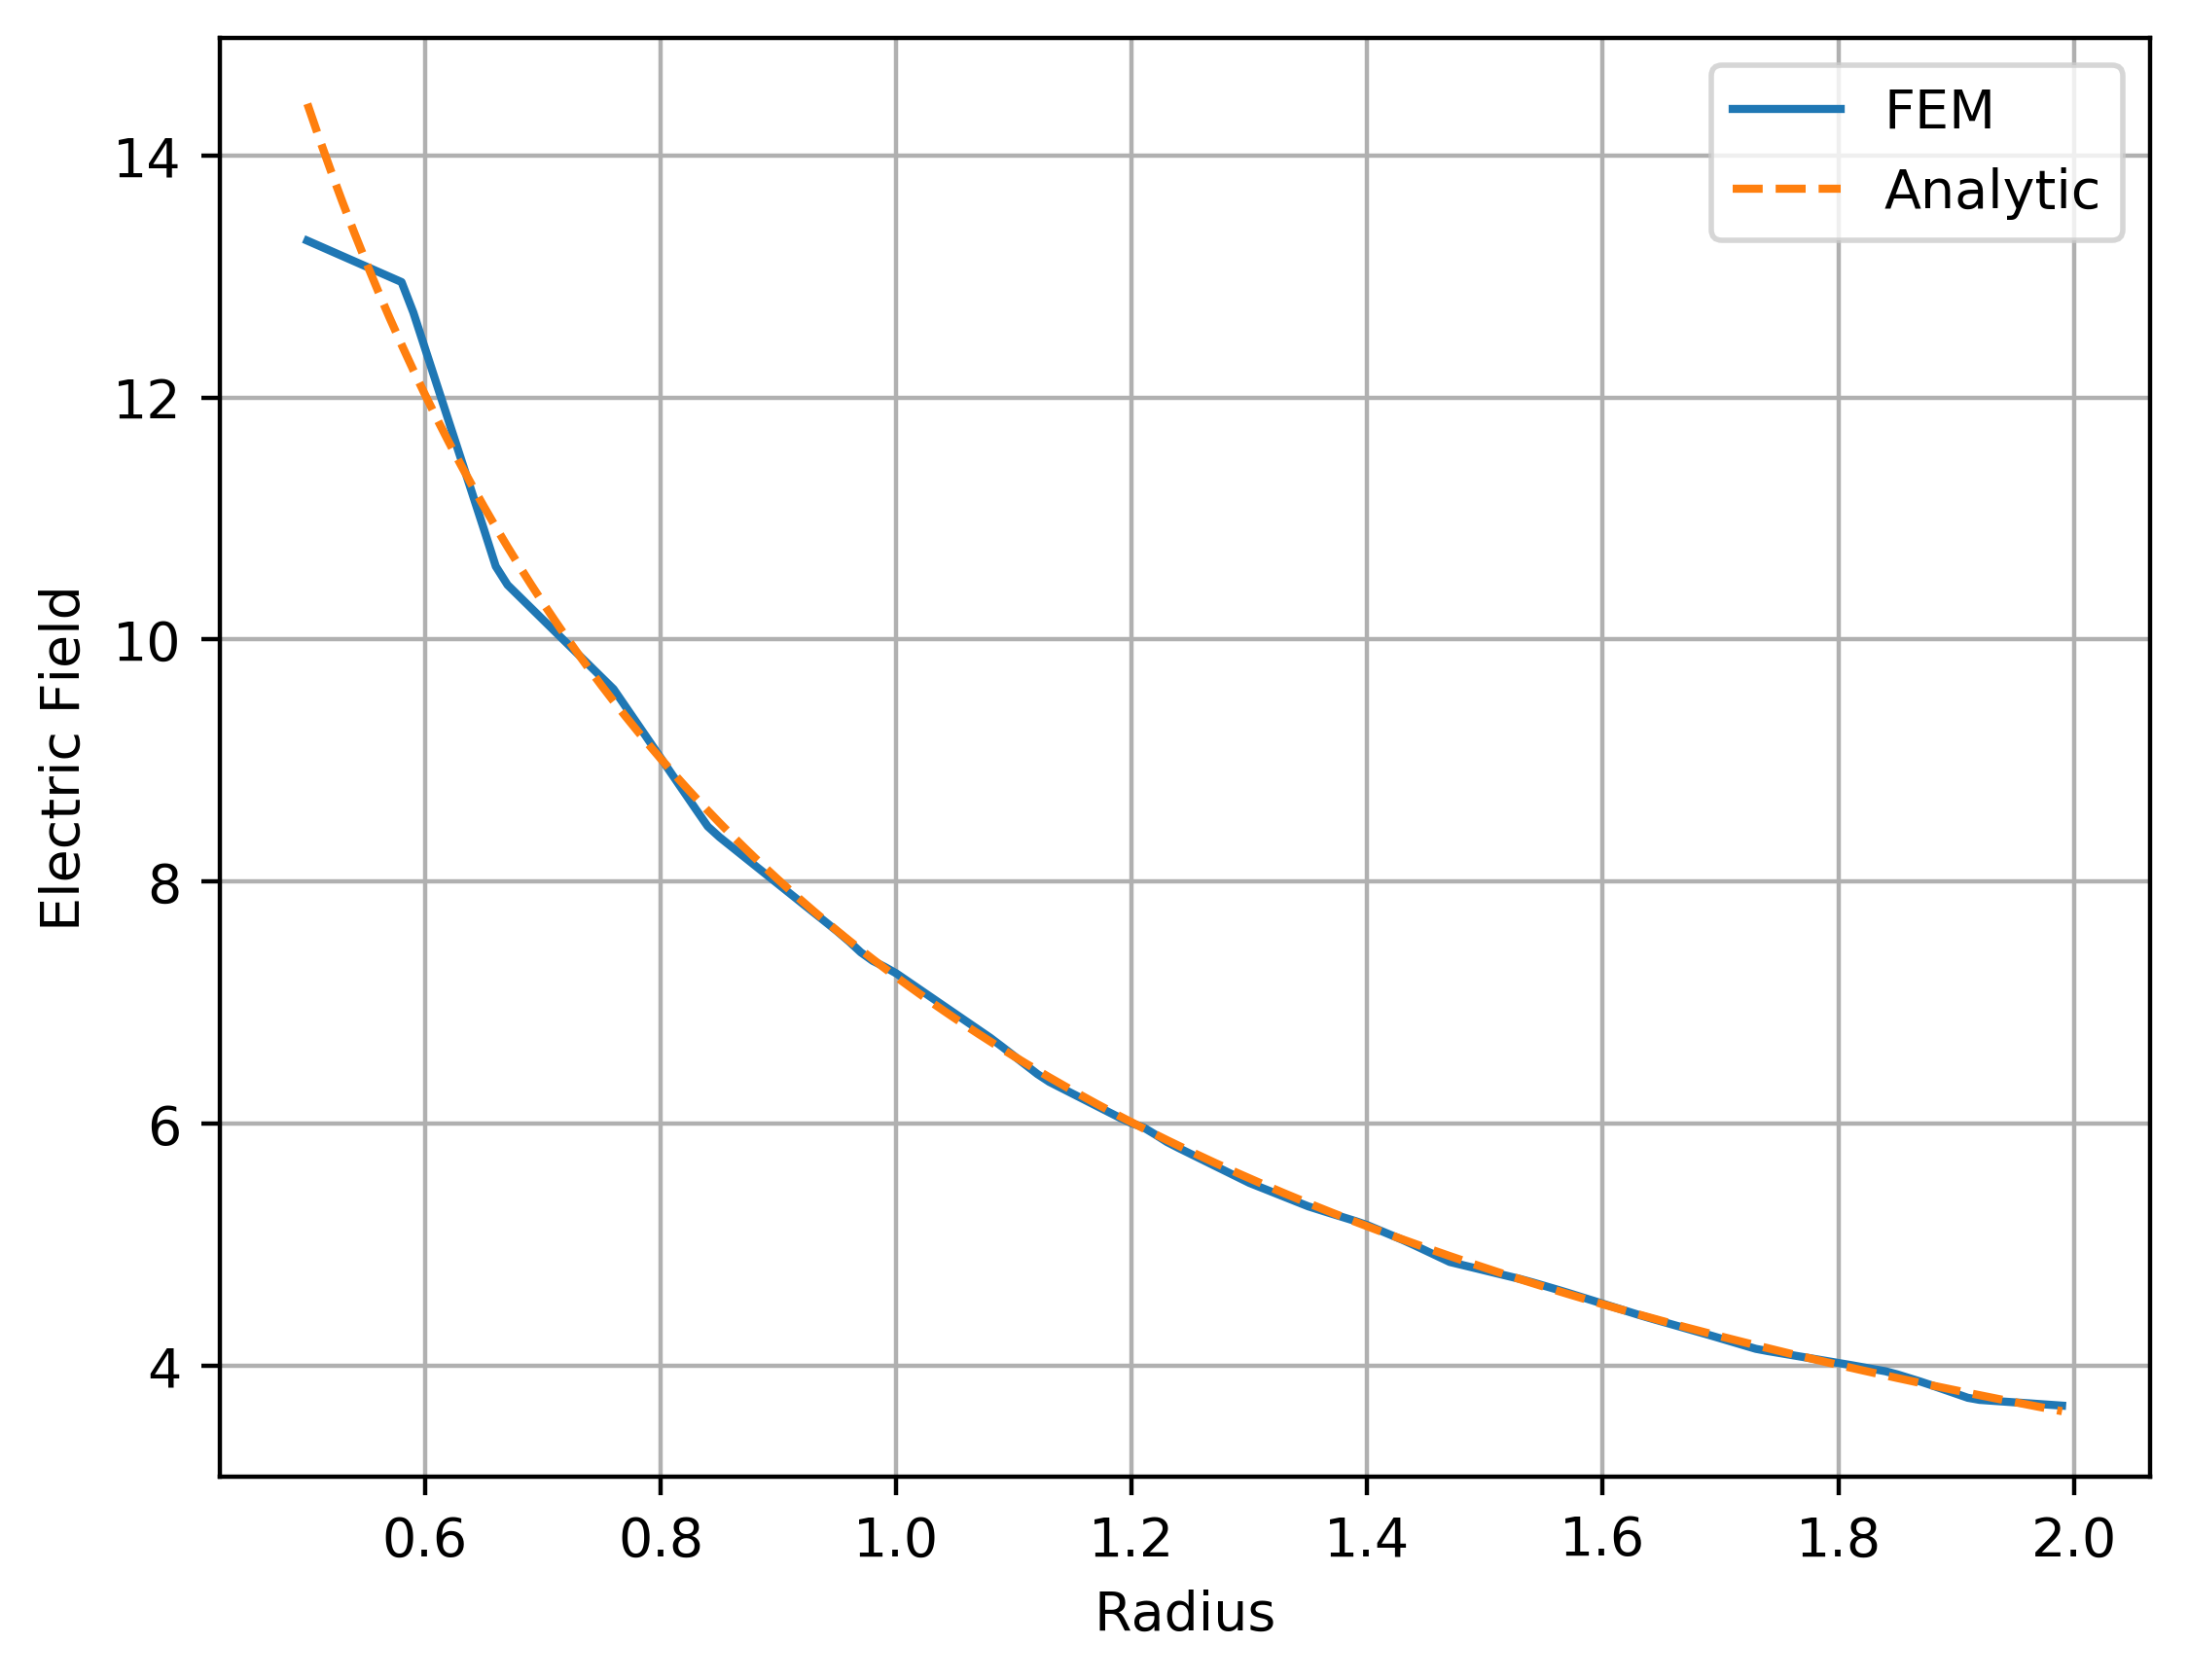

In [11]:
# Comparisson with the Electric Field
# x1 = np.arange(inner_radius, outer_radius, 0.01)
y1 = [e(Point(i, 0))[0] for i in x]
PlotComparissonEField(x, y1, inner_radius, outer_radius)


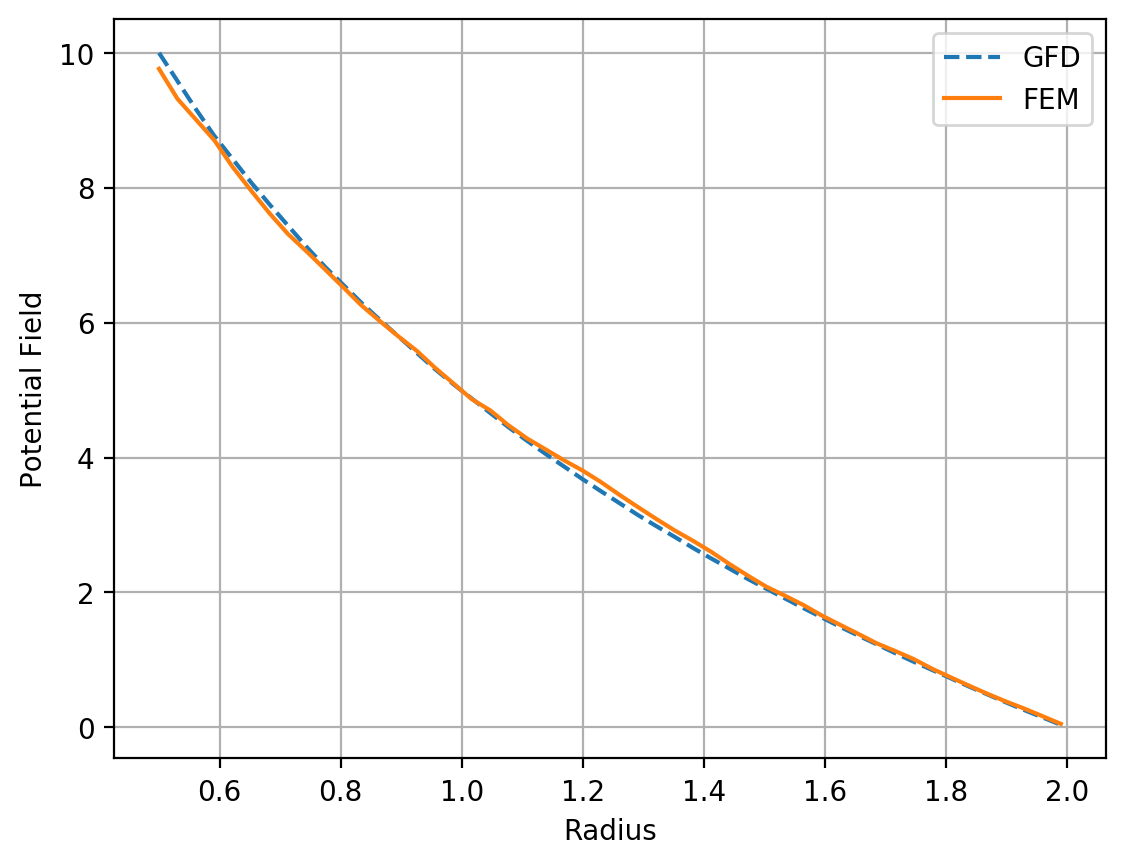

In [12]:
# Comparisson Between The GFD and FEM
y_GFD = np.linspace(inner_radius, 1.99, 50)
x_GFD = [9.762555428523092, 9.318857554051077, 9.012229627298815, 8.705879313276258, 8.307268995965298, 7.958446817264932, 7.622444741738769, 7.3157142041462135, 7.060281301150473, 6.7948868321967195, 6.526696182033194, 6.255402977203453, 6.022882773531246, 5.797185107236807, 5.582935755678979, 5.3300994669419, 5.097092266675937, 4.863517443702829, 4.698388611418365, 4.474858247171111, 4.282023678752375, 4.1210925921725625, 3.959295096913816, 3.809157283281594, 3.6381868579256036, 3.449879466169591, 3.2692930281800363, 3.092650131207359, 2.921500855092335, 2.767342336555782, 2.6025164878272613, 2.4195517571383043, 2.2474037196437164, 2.0839814751516648, 1.9524652880366988, 1.8144556636142921, 1.6588597019916633, 1.5203687826653731, 1.3840209703792197, 1.2444017463585664, 1.130863060722847, 1.0120028681475708, 0.8683026914918783, 0.7428539342886932, 0.6184069311850675, 0.4975050647274445, 0.384132841501089, 0.2787469722797418, 0.16528781686087618, 0.05083508190628628]
y = [u(Point(i, 0)) for i in y_GFD]
plt.figure(dpi=200)
plt.plot(y_GFD, y, '--')
plt.plot(y_GFD, x_GFD)
plt.xlabel("Radius")
plt.ylabel("Potential Field")
plt.legend(["GFD", "FEM"])
plt.grid()
plt.savefig("ComparissonPotentialFEMGFD.png")
plt.show()

In [13]:
# Comparisson with the Potential Field
p = np.arange(inner_radius, outer_radius, 0.01)
q = [u(Point(i, 0)) for i in p]
q1 = [e(Point(i, 0))[0] for i in p]
r = [AnalyticV(i, inner_radius, outer_radius) for i in p]
s = [AnalyticE(i, inner_radius, outer_radius) for i in p]

In [14]:
# # Compute Mean Absolute Percentage Error
# RMSV = round(RMS(np.array(q), np.array(r)), 3)
# # print("RMSE: ", RMSV)
# plt.figure(dpi=400)                       
# plt.plot(p, r) # Model
# plt.plot(p, q, '--')       # FEM
# # # plt.title("Comparisson Between Aproximate and Analytic Solution for Potential")
# plt.xlabel("Radius")
# plt.ylabel("Potential Field")
# plt.legend(["Analytic","FEM, RMS: " + str(RMSV)])
# plt.grid()
# plt.savefig("ComparissonVFieldFEMCoaxial.png")
# plt.show()                  

In [15]:
# # Compute Mean Absolute Percentage Error
# RMSE = round(RMS(np.array(q1), np.array(s)), 3)
# # print("RMSE: ", RMSV)
# plt.figure(dpi=400)                       
# plt.plot(p, s) # Model
# plt.plot(p, q1, '--')       # FEM
# plt.xlabel("Radius")
# plt.ylabel("Potential Field")
# plt.legend(["Analytic","FEM, RMS: " + str(RMSV)])
# plt.grid()

In [16]:
# fig = plt.figure(figsize=(14,5))                       # Set the resolution
# plt.subplot(121)
# plt.plot(p, r) # Model
# plt.plot(p, q, '--') # FEM
# plt.xlabel("Radius") 
# plt.ylabel("Potential Field")
# plt.legend(["Analytic","FEM, RMS: " + str(RMSV)])
# plt.grid()
# # Second Plot
# plt.subplot(122)
# plt.plot(p, s) # Model
# plt.plot(p, q1, '--') # FEM
# plt.xlabel("Radius")
# plt.ylabel("Potential Field")
# plt.legend(["Analytic","FEM, RMS: " + str(RMSE)])
# plt.grid()
# # Save Fig
# plt.savefig("FullComparissonVECoaxial.png")
# plt.show()

In [17]:
# # Comparisson Between The GFD and FEM and Analytic
# y_GFD = np.linspace(inner_radius, 1.99, 50)
# x_GFD = [9.762555428523092, 9.318857554051077, 9.012229627298815, 8.705879313276258, 8.307268995965298, 7.958446817264932, 7.622444741738769, 7.3157142041462135, 7.060281301150473, 6.7948868321967195, 6.526696182033194, 6.255402977203453, 6.022882773531246, 5.797185107236807, 5.582935755678979, 5.3300994669419, 5.097092266675937, 4.863517443702829, 4.698388611418365, 4.474858247171111, 4.282023678752375, 4.1210925921725625, 3.959295096913816, 3.809157283281594, 3.6381868579256036, 3.449879466169591, 3.2692930281800363, 3.092650131207359, 2.921500855092335, 2.767342336555782, 2.6025164878272613, 2.4195517571383043, 2.2474037196437164, 2.0839814751516648, 1.9524652880366988, 1.8144556636142921, 1.6588597019916633, 1.5203687826653731, 1.3840209703792197, 1.2444017463585664, 1.130863060722847, 1.0120028681475708, 0.8683026914918783, 0.7428539342886932, 0.6184069311850675, 0.4975050647274445, 0.384132841501089, 0.2787469722797418, 0.16528781686087618, 0.05083508190628628]
# y = [u(Point(i, 0)) for i in y_GFD]
# r = [AnalyticV(i, inner_radius, outer_radius) for i in y_GFD]
# RMSV_GFD = round(RMS(np.array(r), np.array(x_GFD)), 3)

In [18]:
# # Plot Comparisson Full Analytic, FEM and GFD
# plt.figure(dpi=400)
# plt.plot(y_GFD,r,color = "black")
# plt.plot(y_GFD, y, 'o', color = "red", markersize = 3.0)
# plt.plot(y_GFD, x_GFD, 'o', color = "green", markersize = 3.0)
# plt.xlabel("Radius")
# plt.ylabel("Potential Field")
# plt.legend(["Analytic","FEM, RMS: " + str(RMSV), "GFD, RMS: "+ str(RMSV_GFD)])
# plt.grid()
# plt.savefig("ComparissonPotentialFEMGFD.png")
# plt.show()

In [19]:
# # Plot Zoom in Comparisson Full Analytic, FEM and GFD
# plt.figure(dpi=200)
# plt.plot(y_GFD,r,color = "black")
# plt.plot(y_GFD, y, 'o', color = "red", markersize = 3.0)
# plt.plot(y_GFD, x_GFD, 'o', color = "green", markersize = 3.0)
# plt.xlabel("Radius")
# plt.ylabel("Potential Field")
# # plt.legend(["Analytic","FEM, RMS: " + str(RMSV), "GFD, RMS: "+ str(RMSV_GFD)])
# plt.xlim([0.49, 0.8])
# plt.ylim([6.5, 10.1])
# plt.grid()
# plt.savefig("ComparissonPotentialFEMGFD_Zoom.png")
# plt.show()

In [20]:
# # Get Coordinates of the vertices in the Mesh
# vertex_coordinates = mesh.coordinates()
# x = vertex_coordinates[:,0]
# y = vertex_coordinates[:,1]

# # Plot vertices of the mesh
# fig, ax = plt.subplots(dpi=200)
# ax.set_aspect('equal')
# ax.scatter(x,y, s = 0.5)
# plt.savefig("Coaxial_Vertices.png")
# plt.show()

In [21]:
# final  = time.time()
# print("Total Time: ", final - start)